# Income Bracket 2020

In [1]:
# Dependencies
import requests
import pandas as pd
import matplotlib.pyplot as plt
from census import Census
import json

In [2]:
# Import U.S. Census API Key
from config import census_key

# Create an instance of the Census library
c = Census(
    census_key,
    year = 2020
)

In [3]:
# Run Census Search to retrieve data on all states (2016 ACS5 Census)
census_data = c.acs5.get(
    (
        "NAME",
        "B19013_001E"),
       # "B19301_001E",
       # "B01003_001E"),
    {'for': 'state:*'}
)

# Convert to DataFrame
Income_Bracket_2020 = pd.DataFrame(census_data)

# Column renaming
Income_Bracket_2020 = Income_Bracket_2020.rename(
    columns = {
        "B19013_001E": "Household Income",
#"B19301_001E":"Per Capita Income",
#"B01003_001E":"Population",     
        "NAME": "Name"
    }
)

# Combine two Income Brackets to one column column
#Income_Bracket_2016["Household Income 10,000 to 19,999"] = (Income_Bracket_2016["Household Income 10,000 to 14,999"] + Income_Bracket_2016["Household Income 15,000 to 19,999"]) / 2
#Income_Bracket_2016["Household Income 20,000 to 29,999"] = (Income_Bracket_2016["Household Income 20,000 to 24,999"] + Income_Bracket_2016["Household Income 25,000 to 29,999"]) / 2
#Income_Bracket_2016["Household Income 30,000 to 39,999"] = (Income_Bracket_2016["Household Income 30,000 to 34,999"] + Income_Bracket_2016["Household Income 35,000 to 39,999"]) / 2
#Income_Bracket_2016["Household Income 40,000 to 49,999"] = (Income_Bracket_2016["Household Income 40,000 to 44,999"] + Income_Bracket_2016["Household Income 45,000 to 49,999"]) / 2

# Configure the final DataFrame
#Income_Bracket_2016 = Income_Bracket_2016[
   # [
     #   "Name",
      #  "Household Income Total",
       # "Household Income Less than 10,000",
        #"Household Income 10,000 to 19,999",
        #"Household Income 20,000 to 29,999",
      #  "Household Income 30,000 to 39,999",
       # "Household Income 40,000 to 49,999",
       # "Household Income 50,000 to 59,999",
        #"Household Income 60,000 to 74,999",
       # "Household Income 75,000 to 99,999",
       # "Household Income 100,000 to 124,999",
       # "Household Income 125,000 to 149,999",
       # "Household Income 150,000 to 199,999",
        #"Household Income 200,000 or more"
    #]
#]

# Display DataFrame length and sample data
#print(f"Number of rows in the DataFrame: {len(Income_Bracket_2016)}")
Income_Bracket_2020

,Name,Household Income,state
0,Pennsylvania,63627.0,42
1,California,78672.0,06
2,West Virginia,48037.0,54
3,Utah,74197.0,49
4,New York,71117.0,36
5,District of Columbia,90842.0,11
6,Alaska,77790.0,02
7,Florida,57703.0,12
8,South Carolina,54864.0,45
9,North Dakota,65315.0,38


In [4]:
selected_states = ["California", "Texas", "New York", "Florida", "Illinois"]
selected_bracket = Income_Bracket_2020[Income_Bracket_2020["Name"].isin(selected_states)]
selected_bracket

,Name,Household Income,state
1,California,78672.0,06
4,New York,71117.0,36
7,Florida,57703.0,12
22,Illinois,68428.0,17
24,Texas,63826.0,48


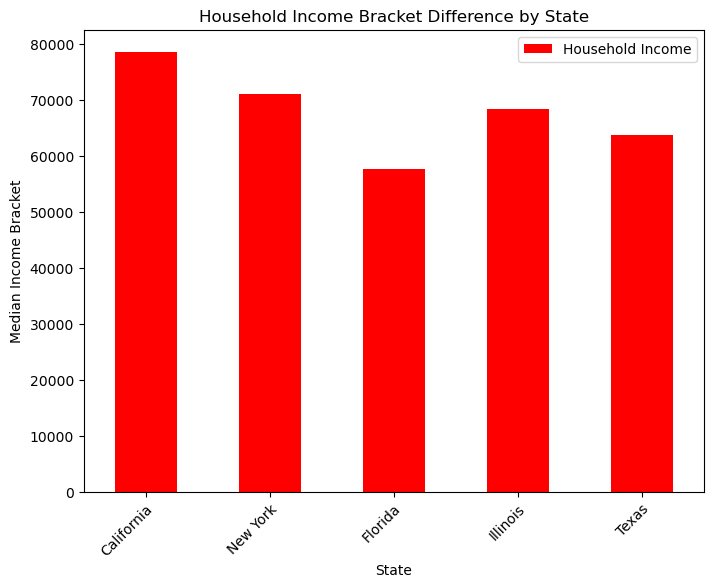

In [5]:
figure8 = selected_bracket.plot(kind="bar", color=["red"], figsize=(8,6),
                           title="Household Income Bracket Difference by State",
                           xlabel="State",
                           ylabel="Median Income Bracket")

figure8.set_xticklabels(selected_bracket['Name'], rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.savefig("output_data/Fig8.png")
plt.show()

In [10]:
Income_Bracket_2020.to_csv("output_data/Income Bracket 2020 Median Household.csv")